In [25]:
import pandas as pd
import numpy as np
import re

PATH = "/Users/abrar/Downloads/CMO-Historical-Data-Monthly.xlsx"

def load_pinksheet_monthly_prices(path: str) -> pd.DataFrame:
    # Read raw sheet with no headers (because headers are spread across rows)
    raw = pd.read_excel(path, sheet_name="Monthly Prices", header=None)

    # Row 4 = names, Row 5 = units (0-based indexing)
    names = raw.iloc[4].tolist()
    units = raw.iloc[5].tolist()

    # Build final column names
    cols = ["Date"]
    for n, u in zip(names[1:], units[1:]):
        if pd.isna(n):
            cols.append(None)
            continue
        n = str(n).strip()
        if pd.isna(u):
            cols.append(n)
        else:
            u = str(u).strip()
            # Avoid double-adding unit if it’s already inside the name
            cols.append(n if (not u or u in n) else f"{n} {u}")

    # Data starts at row 6
    df = raw.iloc[6:, :len(cols)].copy()
    df.columns = cols
    df = df.dropna(subset=["Date"])

    # Convert '1960M01' -> month-end timestamp (1960-01-31)
    yyyymm = df["Date"].astype(str).str.strip().str.replace("M", "", regex=False)
    dt_index = (
        pd.to_datetime(yyyymm, format="%Y%m", errors="coerce")
          .dt.to_period("M")
          .dt.to_timestamp("M")
    )

    df = df.drop(columns=["Date"])
    df.index = dt_index
    df.index.name = "Date"

    # Clean missing markers and force numeric
    df = df.replace({"…": np.nan, "..": np.nan, ".": np.nan, "": np.nan})
    df = df.apply(pd.to_numeric, errors="coerce")

    return df

prices = load_pinksheet_monthly_prices(PATH)

print(prices.shape)
print(prices.head(3))


(792, 71)
            Crude oil, average ($/bbl)  Crude oil, Brent ($/bbl)  \
Date                                                               
1960-01-31                        1.63                      1.63   
1960-02-29                        1.63                      1.63   
1960-03-31                        1.63                      1.63   

            Crude oil, Dubai ($/bbl)  Crude oil, WTI ($/bbl)  \
Date                                                           
1960-01-31                      1.63                     NaN   
1960-02-29                      1.63                     NaN   
1960-03-31                      1.63                     NaN   

            Coal, Australian ($/mt)  Coal, South African ** ($/mt)  \
Date                                                                 
1960-01-31                      NaN                            NaN   
1960-02-29                      NaN                            NaN   
1960-03-31                      NaN             

/var/folders/60/yq56680x3q1cdy6krgss98000000gn/T/ipykernel_17940/3883063050.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"…": np.nan, "..": np.nan, ".": np.nan, "": np.nan})


In [26]:
print(list(prices.columns))


['Crude oil, average ($/bbl)', 'Crude oil, Brent ($/bbl)', 'Crude oil, Dubai ($/bbl)', 'Crude oil, WTI ($/bbl)', 'Coal, Australian ($/mt)', 'Coal, South African ** ($/mt)', 'Natural gas, US ($/mmbtu)', 'Natural gas, Europe ($/mmbtu)', 'Liquefied natural gas, Japan ($/mmbtu)', 'Natural gas index (2010=100)', 'Cocoa ($/kg)', 'Coffee, Arabica ($/kg)', 'Coffee, Robusta ($/kg)', 'Tea, avg 3 auctions ($/kg)', 'Tea, Colombo ($/kg)', 'Tea, Kolkata ($/kg)', 'Tea, Mombasa ($/kg)', 'Coconut oil ($/mt)', 'Groundnuts ($/mt)', 'Fish meal ($/mt)', 'Groundnut oil ** ($/mt)', 'Palm oil ($/mt)', 'Palm kernel oil ($/mt)', 'Soybeans ($/mt)', 'Soybean oil ($/mt)', 'Soybean meal ($/mt)', 'Rapeseed oil ($/mt)', 'Sunflower oil ($/mt)', 'Barley ($/mt)', 'Maize ($/mt)', 'Sorghum ($/mt)', 'Rice, Thai 5% ($/mt)', 'Rice, Thai 25% ($/mt)', 'Rice, Thai A.1 ($/mt)', 'Rice, Viet Namese 5% ($/mt)', 'Wheat, US SRW ($/mt)', 'Wheat, US HRW ($/mt)', 'Banana, Europe ($/kg)', 'Banana, US ($/kg)', 'Orange ($/kg)', 'Beef ** ($

In [27]:
commodity_names = [re.sub(r"\s*\([^)]*\)\s*$", "", c).strip() for c in prices.columns]
print(commodity_names)
print("Count:", len(commodity_names))


['Crude oil, average', 'Crude oil, Brent', 'Crude oil, Dubai', 'Crude oil, WTI', 'Coal, Australian', 'Coal, South African **', 'Natural gas, US', 'Natural gas, Europe', 'Liquefied natural gas, Japan', 'Natural gas index', 'Cocoa', 'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions', 'Tea, Colombo', 'Tea, Kolkata', 'Tea, Mombasa', 'Coconut oil', 'Groundnuts', 'Fish meal', 'Groundnut oil **', 'Palm oil', 'Palm kernel oil', 'Soybeans', 'Soybean oil', 'Soybean meal', 'Rapeseed oil', 'Sunflower oil', 'Barley', 'Maize', 'Sorghum', 'Rice, Thai 5%', 'Rice, Thai 25%', 'Rice, Thai A.1', 'Rice, Viet Namese 5%', 'Wheat, US SRW', 'Wheat, US HRW', 'Banana, Europe', 'Banana, US', 'Orange', 'Beef **', 'Chicken **', 'Lamb **', 'Shrimps, Mexican', 'Sugar, EU', 'Sugar, US', 'Sugar, world', 'Tobacco, US import u.v.', 'Logs, Cameroon', 'Logs, Malaysian', 'Sawnwood, Cameroon', 'Sawnwood, Malaysian', 'Plywood', 'Cotton, A Index', 'Rubber, TSR20 **', 'Rubber, RSS3', 'Phosphate rock', 'DAP', 'TSP', 'Ur

In [28]:
monthly_last = prices.resample("M").last()
monthly_last.head()


/var/folders/60/yq56680x3q1cdy6krgss98000000gn/T/ipykernel_17940/676366105.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_last = prices.resample("M").last()


,"Crude oil, average ($/bbl)","Crude oil, Brent ($/bbl)","Crude oil, Dubai ($/bbl)","Crude oil, WTI ($/bbl)","Coal, Australian ($/mt)","Coal, South African ** ($/mt)","Natural gas, US ($/mmbtu)","Natural gas, Europe ($/mmbtu)","Liquefied natural gas, Japan ($/mmbtu)",Natural gas index (2010=100),...,Aluminum ($/mt),"Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Lead ($/mt),Tin ($/mt),Nickel ($/mt),Zinc ($/mt),Gold ($/troy oz),Platinum ($/troy oz),Silver ($/troy oz)
Date,,,,,,,,,,,,,,,,,,,,,
1960-01-31,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,NaN,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1960-02-29,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,NaN,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
1960-03-31,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,NaN,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
1960-04-30,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,NaN,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
1960-05-31,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,NaN,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [29]:
import pandas as pd

def clean_prices(prices: pd.DataFrame) -> pd.DataFrame:
    prices = prices.copy()

    # ensure datetime index
    prices.index = pd.to_datetime(prices.index, errors="coerce")
    prices = prices[~prices.index.isna()].sort_index()

    # remove duplicated whitespace + normalize column text
    prices.columns = (
        prices.columns.astype(str)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )

    # convert all to numeric
    prices = prices.apply(pd.to_numeric, errors="coerce")

    # drop columns that are entirely empty
    prices = prices.dropna(axis=1, how="all")

    return prices

prices = clean_prices(prices)   # <- use your current df variable name here
prices.shape


(792, 71)

In [30]:
prices["Gold"] = prices["Gold ($/troy oz)"]
prices["Gold"].dropna().head()


Date
1960-01-31    35.27
1960-02-29    35.27
1960-03-31    35.27
1960-04-30    35.27
1960-05-31    35.27
Name: Gold, dtype: float64

In [31]:
macro_cols = [
    "Crude oil, WTI ($/bbl)",
    "Natural gas, US ($/mmbtu)",
    "Silver ($/troy oz)",
    "Copper ($/mt)",
    "Coal, Australian ($/mt)"
]

# Keep only those that exist
macro_cols = [c for c in macro_cols if c in prices.columns]

prices[["Gold"] + macro_cols].dropna().tail()


,Gold,"Crude oil, WTI ($/bbl)","Natural gas, US ($/mmbtu)",Silver ($/troy oz),Copper ($/mt),"Coal, Australian ($/mt)"
Date,,,,,,
2025-08-31,3368.03,64.08,2.9105,38.185,9669.56,112.15
2025-09-30,3667.68,63.67,2.9733,42.816,9983.79,106.32
2025-10-31,4058.33,60.17,3.1973,49.439,10739.91,107.50
2025-11-30,4087.19,59.57,3.7912,50.432,10812.03,112.60
2025-12-31,4309.23,57.94,4.2514,62.342,11785.25,107.67


<Axes: title={'center': 'Gold vs Macro Commodities (Normalized)'}, xlabel='Date'>

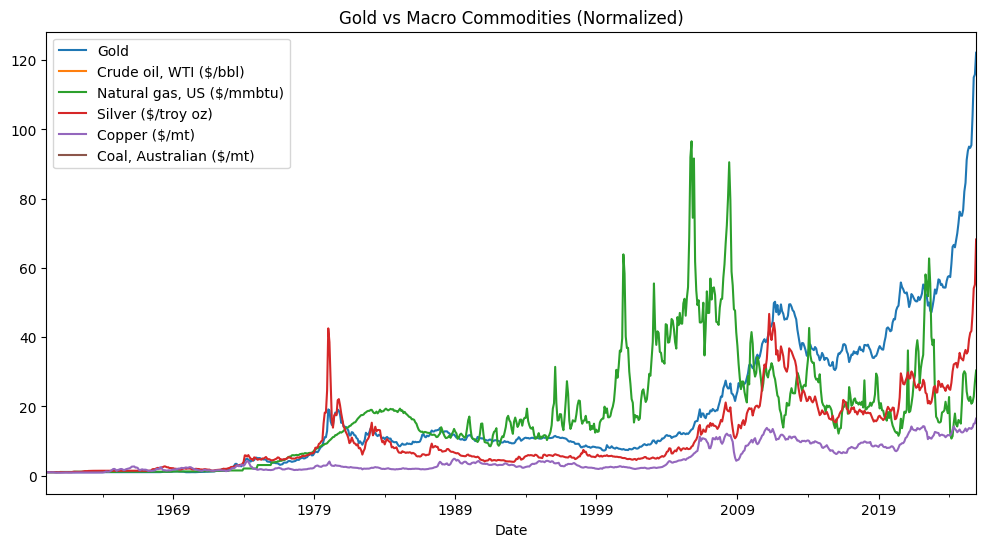

In [32]:
norm = prices[["Gold"] + macro_cols].apply(lambda x: x / x.iloc[0])
norm.plot(figsize=(12,6), title="Gold vs Macro Commodities (Normalized)")


In [33]:
prices[["Gold"] + macro_cols].corr()["Gold"].sort_values(ascending=False)


Gold                         1.000000
Silver ($/troy oz)           0.928940
Copper ($/mt)                0.904490
Coal, Australian ($/mt)      0.685184
Crude oil, WTI ($/bbl)       0.665123
Natural gas, US ($/mmbtu)    0.389697
Name: Gold, dtype: float64

In [34]:
df = prices.copy()
df["Gold"] = df["Gold ($/troy oz)"]


In [35]:
macro = [
    "Crude oil, WTI ($/bbl)",
    "Crude oil, Brent ($/bbl)",
    "Natural gas, US ($/mmbtu)",
    "Natural gas, Europe ($/mmbtu)",
    "Silver ($/troy oz)",
    "Copper ($/mt)",
    "Coal, Australian ($/mt)",
    "Platinum ($/troy oz)",
    "Zinc ($/mt)"
]

cols = ["Gold"] + [c for c in macro if c in df.columns]
X = df[cols].dropna()


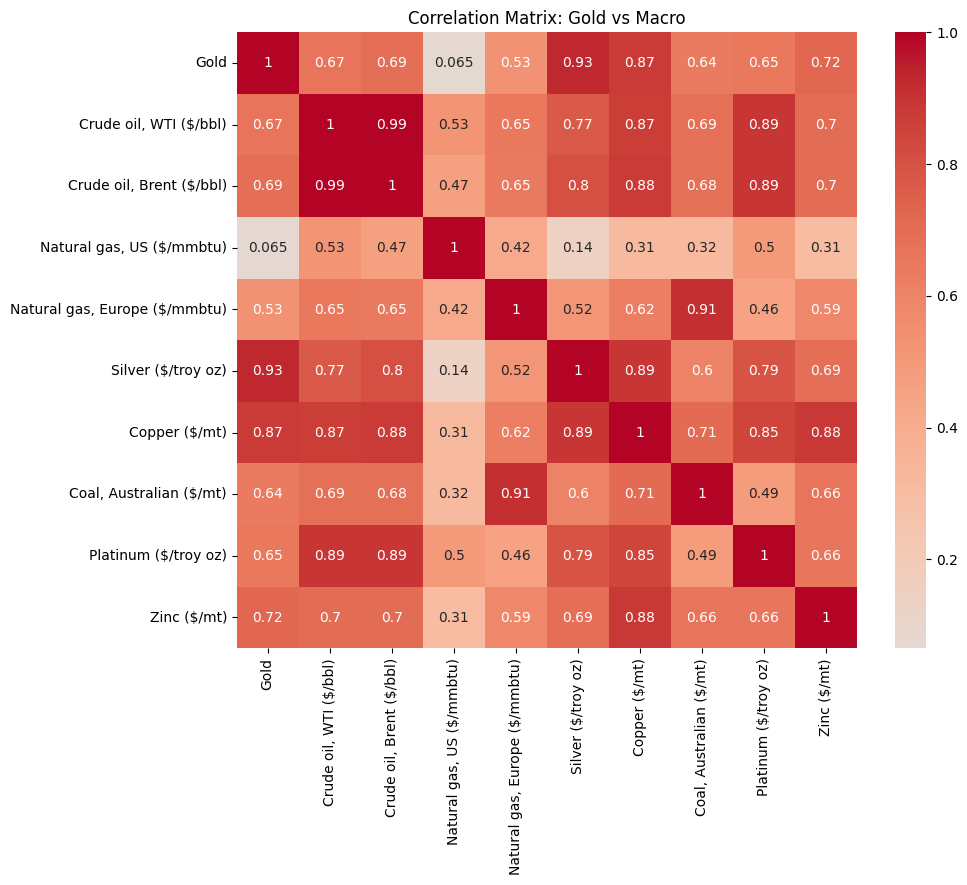

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Gold vs Macro")
plt.show()


<Figure size 1200x600 with 0 Axes>

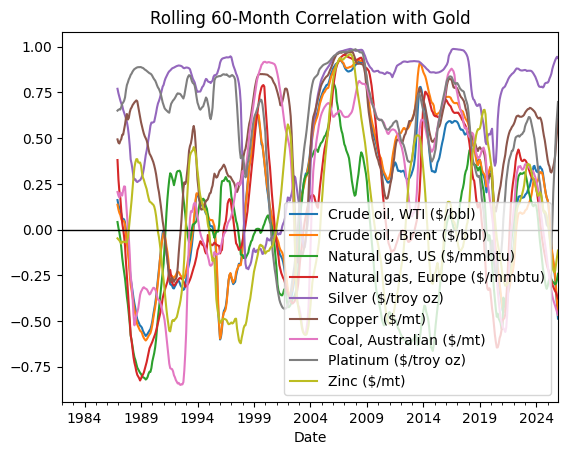

In [37]:
roll = X.rolling(60).corr(X["Gold"]).drop("Gold", axis=1)

plt.figure(figsize=(12,6))
roll.plot()
plt.axhline(0, color="black", lw=1)
plt.title("Rolling 60-Month Correlation with Gold")
plt.show()


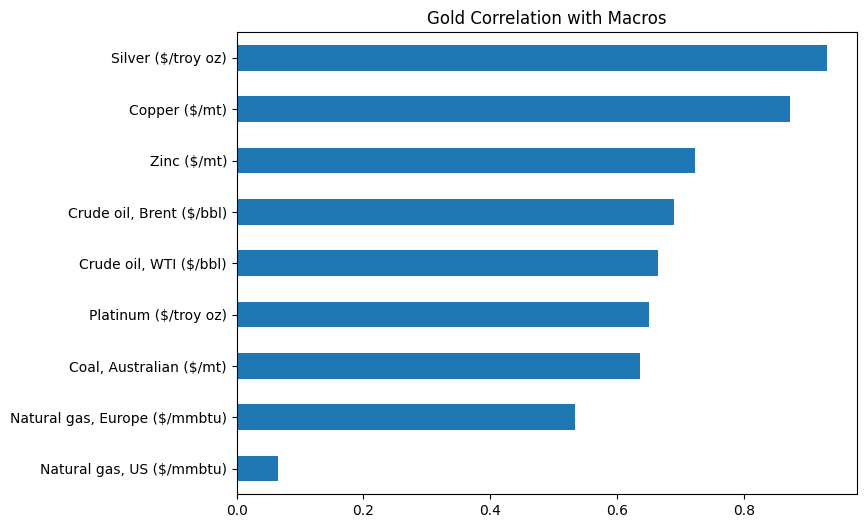

In [38]:
gold_corr = X.corr()["Gold"].drop("Gold").sort_values()

gold_corr.plot(kind="barh", figsize=(8,6))
plt.title("Gold Correlation with Macros")
plt.show()


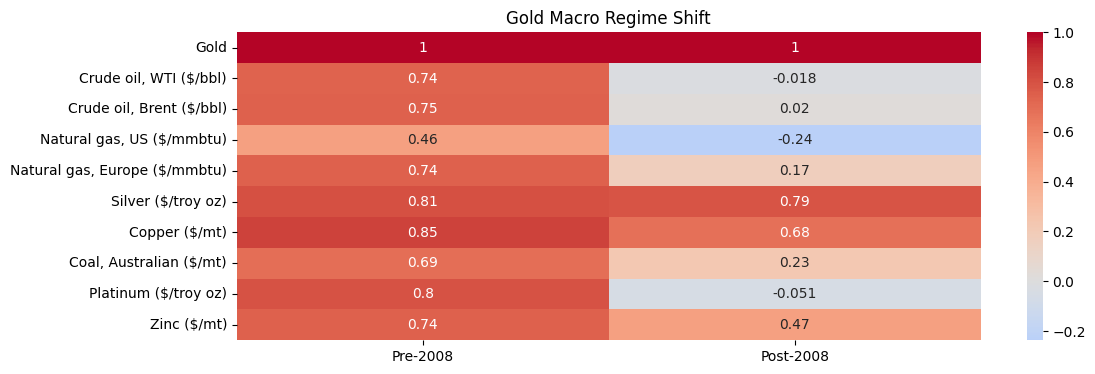

In [39]:
pre = X.loc[: "2007-12"]
post = X.loc["2008-01":]

plt.figure(figsize=(12,4))
sns.heatmap(
    pd.concat([pre.corr()["Gold"], post.corr()["Gold"]], axis=1),
    annot=True, cmap="coolwarm", center=0,
    yticklabels=True,
    xticklabels=["Pre-2008","Post-2008"]
)
plt.title("Gold Macro Regime Shift")
plt.show()


In [40]:
# quick search for likely corn/rice columns in your dataset
cols = prices.columns.astype(str).tolist()

hits = [c for c in cols if any(k in c.lower() for k in ["corn", "maize", "rice"])]
hits[:50], len(hits)


(['Maize ($/mt)',
  'Rice, Thai 5% ($/mt)',
  'Rice, Thai 25% ($/mt)',
  'Rice, Thai A.1 ($/mt)',
  'Rice, Viet Namese 5% ($/mt)'],
 5)

In [41]:
import difflib

def pick_cols(prices_cols, wanted, cutoff=0.6):
    """
    Returns (selected_cols, missing_map)
    selected_cols: list of actual column names found
    missing_map: dict wanted -> [close matches]
    """
    prices_cols = list(map(str, prices_cols))
    selected = []
    missing = {}
    for w in wanted:
        if w in prices_cols:
            selected.append(w)
            continue
        close = difflib.get_close_matches(w, prices_cols, n=5, cutoff=cutoff)
        if close:
            # take best match automatically
            selected.append(close[0])
            missing[w] = close
        else:
            missing[w] = []
    # de-duplicate while preserving order
    seen = set()
    selected_unique = []
    for c in selected:
        if c not in seen:
            selected_unique.append(c)
            seen.add(c)
    return selected_unique, missing

stress_cols_wanted = [
    "Crude oil, WTI ($/bbl)",
    "Crude oil, Brent ($/bbl)",
    "Natural gas, US ($/mmbtu)",
    "Natural gas, Europe ($/mmbtu)",
    "Coal, Australian ($/mt)",
    "Gold ($/troy oz)",
    "Silver ($/troy oz)",
    "Platinum ($/troy oz)",
    "Copper ($/mt)",
    "Wheat, US HRW ($/mt)",
    "Corn ($/mt)",
    "Rice ($/mt)"
]

selected_cols, match_report = pick_cols(prices.columns, stress_cols_wanted, cutoff=0.55)

print("Selected columns actually used:\n", *selected_cols, sep=" - ")

# Show what got substituted (including Corn/Rice)
print("\nMatch report (wanted -> close matches):")
for k, v in match_report.items():
    if k not in selected_cols:  # this condition isn't perfect; just print all
        pass
    print(f"{k} -> {v}")


Selected columns actually used:
 - Crude oil, WTI ($/bbl) - Crude oil, Brent ($/bbl) - Natural gas, US ($/mmbtu) - Natural gas, Europe ($/mmbtu) - Coal, Australian ($/mt) - Gold ($/troy oz) - Silver ($/troy oz) - Platinum ($/troy oz) - Copper ($/mt) - Wheat, US HRW ($/mt) - Nickel ($/mt)

Match report (wanted -> close matches):
Corn ($/mt) -> ['Copper ($/mt)', 'Tin ($/mt)', 'Zinc ($/mt)', 'Urea ($/mt)', 'Sorghum ($/mt)']
Rice ($/mt) -> ['Nickel ($/mt)', 'Zinc ($/mt)', 'Maize ($/mt)', 'Tin ($/mt)', 'Urea ($/mt)']


In [42]:
stress_df = prices[selected_cols].copy().sort_index()

# Fill and drop early missing periods
stress_df = stress_df.ffill().dropna()

# z-score each series
z = (stress_df - stress_df.mean()) / stress_df.std()

msi = z.mean(axis=1)
msi.name = "MSI"

msi.head(), msi.describe()


(Date
 1982-01-31   -0.574110
 1982-02-28   -0.587115
 1982-03-31   -0.629305
 1982-04-30   -0.616005
 1982-05-31   -0.626675
 Name: MSI, dtype: float64,
 count    5.280000e+02
 mean     1.076580e-16
 std      8.305083e-01
 min     -9.496486e-01
 25%     -7.197976e-01
 50%     -2.641939e-01
 75%      6.946721e-01
 max      2.548589e+00
 Name: MSI, dtype: float64)

In [43]:
# Find gold column robustly
gold_candidates = [c for c in prices.columns if "gold" in str(c).lower()]
gold_candidates[:10]



['Gold ($/troy oz)', 'Gold']

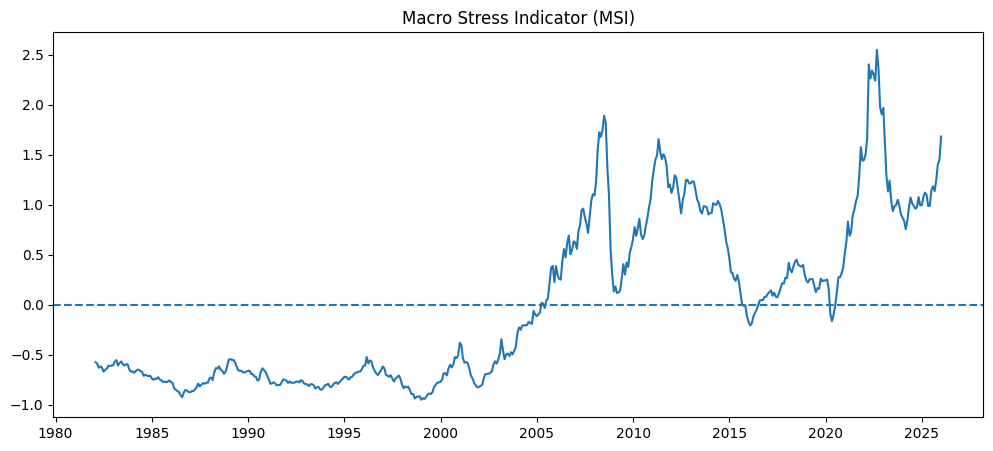

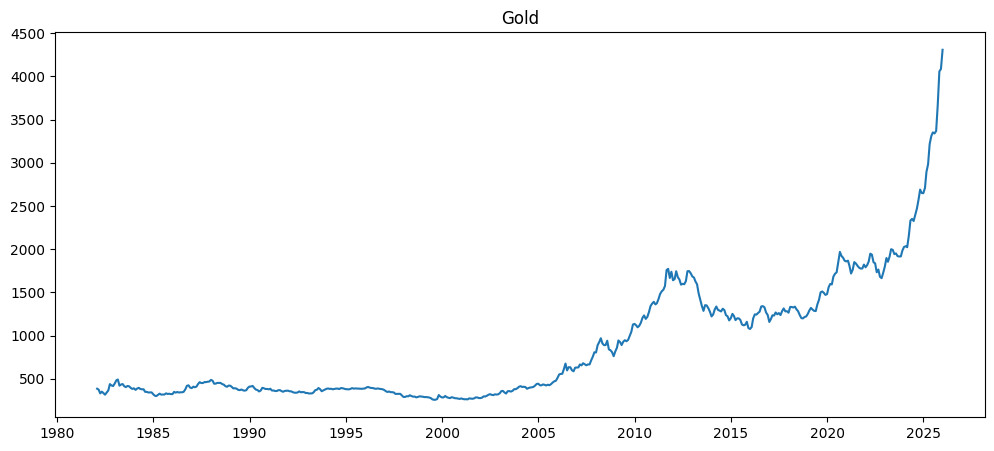

In [44]:
gold_col = gold_candidates[0]
out = pd.concat([msi, prices[gold_col]], axis=1).dropna()
out.columns = ["MSI", "Gold"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(out.index, out["MSI"])
plt.axhline(0, linestyle="--")
plt.title("Macro Stress Indicator (MSI)")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(out.index, out["Gold"])
plt.title("Gold")
plt.show()


In [46]:
gold_col = [c for c in prices.columns if "Gold" in c][0]

gold = prices[gold_col]
gold_ret = np.log(gold / gold.shift(1))

msi_ret = np.log(msi / msi.shift(1))


/Users/abrar/.pyenv/versions/3.11.6/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


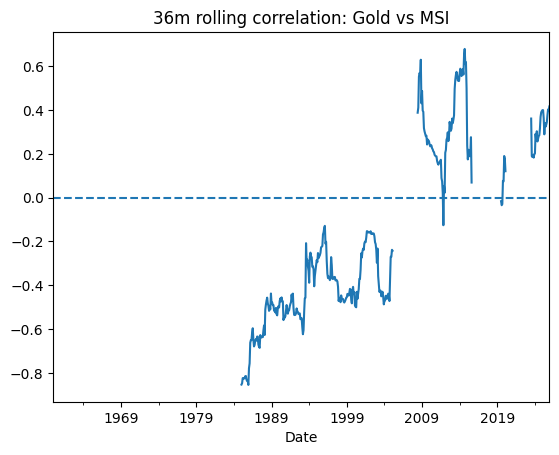

In [47]:
roll = gold_ret.rolling(36).corr(msi_ret)

roll.plot(title="36m rolling correlation: Gold vs MSI")
plt.axhline(0, ls="--")
plt.show()


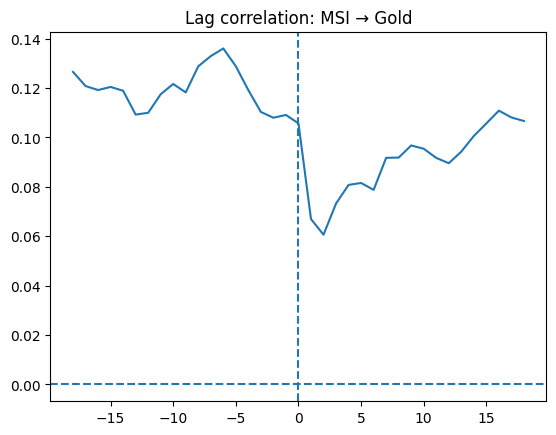

In [48]:
lags = range(-18, 19)
lag_corr = []

for L in lags:
    lag_corr.append(gold_ret.corr(msi.shift(L)))

plt.plot(lags, lag_corr)
plt.axhline(0, ls="--")
plt.axvline(0, ls="--")
plt.title("Lag correlation: MSI → Gold")
plt.show()


In [52]:
# align on the same dates first
tmp = pd.concat(
    {"msi": msi, "gold_ret": gold_ret},
    axis=1
).dropna()

hi = tmp["msi"] > tmp["msi"].quantile(0.75)
lo = tmp["msi"] < tmp["msi"].quantile(0.25)

gold_hi = tmp.loc[hi, "gold_ret"].mean()
gold_lo = tmp.loc[lo, "gold_ret"].mean()

gold_hi, gold_lo


(np.float64(0.009681380147403112), np.float64(0.001224529700448851))

In [53]:
msi.index.min(), msi.index.max(), msi.index.freq
gold_ret.index.min(), gold_ret.index.max(), gold_ret.index.freq


(Timestamp('1960-01-31 00:00:00'), Timestamp('2025-12-31 00:00:00'), None)

In [54]:
tmp = pd.concat({"msi": msi, "gold": prices["Gold ($/troy oz)"]}, axis=1).sort_index()

tmp["gold_ret"] = tmp["gold"].pct_change()
tmp = tmp.dropna()

hi = tmp["msi"] > tmp["msi"].quantile(0.75)
lo = tmp["msi"] < tmp["msi"].quantile(0.25)

tmp.loc[hi, "gold_ret"].mean(), tmp.loc[lo, "gold_ret"].mean()


(np.float64(0.010460984124872693), np.float64(0.0018090007789924908))

In [55]:
# returns for all commodities
rets = prices.pct_change()

# optional: change in MSI (or percent change)
msi_chg = msi.diff()

df = pd.concat([msi.rename("msi"), msi_chg.rename("msi_chg"), rets], axis=1).dropna()

corr = df.corr(numeric_only=True)[["msi","msi_chg"]].sort_values("msi", ascending=False)
corr.head(15), corr.tail(15)


/var/folders/60/yq56680x3q1cdy6krgss98000000gn/T/ipykernel_17940/3965659355.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = prices.pct_change()


(                                             msi   msi_chg
 msi                                     1.000000  0.100729
 Phosphate rock ($/mt)                   0.213033 -0.106978
 Liquefied natural gas, Japan ($/mmbtu)  0.195720  0.017530
 TSP ($/mt)                              0.157166  0.347347
 Natural gas index (2010=100)            0.123720  0.573179
 Natural gas, Europe ($/mmbtu)           0.119130  0.393372
 Coal, Australian ($/mt)                 0.112833  0.537329
 DAP ($/mt)                              0.111714  0.276649
 Tobacco, US import u.v. ($/mt)          0.106971  0.022686
 msi_chg                                 0.100729  1.000000
 Fish meal ($/mt)                        0.098924  0.046761
 Coal, South African ** ($/mt)           0.092704  0.548195
 Groundnut oil ** ($/mt)                 0.086147  0.066279
 Urea ($/mt)                             0.081788  0.147956
 Beef ** ($/kg)                          0.080044  0.216439,
                                       

In [56]:
tmp = pd.concat({"msi": msi, "gold": prices["Gold ($/troy oz)"]}, axis=1).dropna()
tmp["gold_ret_fwd1"] = tmp["gold"].pct_change().shift(-1)  # next month return
tmp = tmp.dropna()
